In [57]:
from newsapi import NewsApiClient
import requests
from PIL import Image, ImageOps
from marxify import Marxify
import tweepy

In [75]:
# Prepare APIs

# NewsAPI
newsapi = NewsApiClient(api_key='bbba33d91ef64b5cafeea9be97da9538')
country = 'us' 

# Twitter API
# I have regenerated these so they won't work
consumer_key = 'WrPTmBaJESVs7eLfwkiVaqQ7U'
consumer_secret = 'MQmk7QllutWAtVMA9GWDenk4Ta2npiBQY8qFiyyim7ksQHhSP6'
access_token = '3264530906-gJCKvK5i0sqSZaWTkRvUZVkpgYNGEAf5fIA2oP8'
access_token_secret = 'fWvCRNVs3D3LLxlujVtw6DJNaY37dHxRMsLFlSuEHQr4l'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterApi = tweepy.API(auth)

# picture file name
pic_filename = 'pic.png'

In [77]:
# Get latest news and picture
headlines = newsapi.get_top_headlines(country=country)
articleJson = sorted([r for r in headlines['articles'] if r['content'] is not None], key=lambda r: r['content'])[2]
imageUrl = articleJson['urlToImage']
image = Image.open(requests.get(imageUrl, stream=True).raw).convert(mode='RGBA')
image = image.resize((800,450))

# overlay communist symbol
communistSymbol = Image.open('assets/hammer_sickle_and_star.png').resize((180,200))
image.alpha_composite(communistSymbol, (10,10))
image.save(pic_filename)

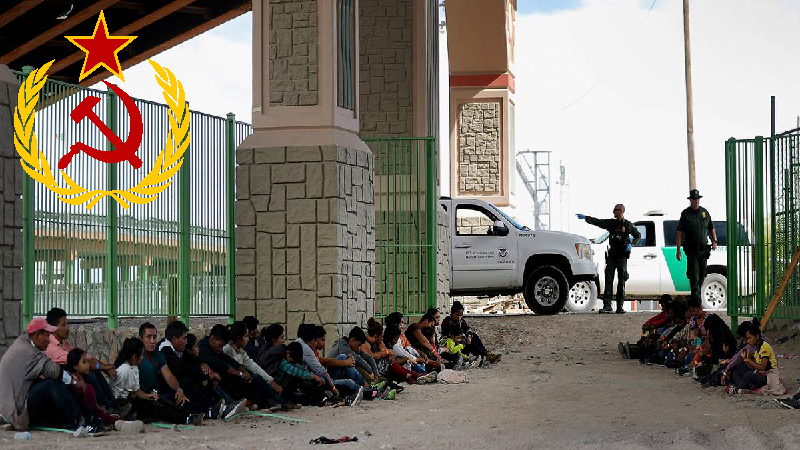

In [78]:
image

In [79]:
# train model
model = Marxify(articleJson['content'][:-15])

In [84]:
# get status text
status = model.makeCommunistSentence()
status += ' #%s #%s #%s #marxovchain' % (model._keywords[0], model._keywords[1], model._keywords[2])

In [85]:
status

'Border Patrol officers encountered more than 144,000 undocumented immigrants at the community of women; it has existed almost from time immemorial. #border #132 #144 #marxovchain'

In [74]:
model._keywords

array(['beta', 'developer', 'install', 'apple', 'officially'],
      dtype='<U22')

In [56]:
# upload to Twitter
twitterApi.update_with_media(status=status, filename=pic_filename)

Status(_api=<tweepy.api.API object at 0x0000020905DE9518>, _json={'created_at': 'Wed Jun 05 03:17:23 +0000 2019', 'id': 1136109733687914496, 'id_str': '1136109733687914496', 'text': 'In all these proposals, point solely to the same thing when he took the field Tuesday morning, wearing a Jets helme… https://t.co/8bZz7P0AI6', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/8bZz7P0AI6', 'expanded_url': 'https://twitter.com/i/web/status/1136109733687914496', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://manna.orasphong.com" rel="nofollow">manna-test</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3264530906, 'id_str': '3264530906', 'name': 'Oras Phong', 'screen_name': 'orasphong', 'location': '', 'description': '', 'url': None, 'entities': 